<a href="https://colab.research.google.com/github/Rufix9ic/3mtt/blob/main/Predicting_carbon_footprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: erform exploratory data analysis (EDA).
# The goal is to analyze carbon footprint trends and recommend actionable steps for emission reduction in specific segments (upstream, operations, downstream). This project will focus on:
# Identifying key contributors to emissions in each segment.
# Providing segment-specific strategies for emission reduction. Build and train machine learning models (clustering and decision trees).
# Provide recommendations based on the results. based on this data features company	country	industry_group	weight_kg	carbon_footprint_pcf	upstream_percent_total_pcf	operations_percent_total_pcf	downstream_percent_total_pcf
# Kellogg Company	USA	Food, Beverage & Tobacco	0.7485	2	57.50%	30.00%	12.50%
# Kellogg Company	USA	Food & Beverage Processing	0.7485	2	57.50%	30.00%	12.50%
# KNOLL INC	USA	Capital Goods	20.68	72.54	80.63%	17.36%	2.01%
# Konica Minolta, Inc.	Japan	Technology Hardware & Equipment	110	1488	30.65%	5.51%	63.84%

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data (replace with your actual data)
data = {
    'company': ['Kellogg Company', 'Kellogg Company', 'KNOLL INC', 'Konica Minolta, Inc.'],
    'country': ['USA', 'USA', 'USA', 'Japan'],
    'industry_group': ['Food, Beverage & Tobacco', 'Food & Beverage Processing', 'Capital Goods', 'Technology Hardware & Equipment'],
    'weight_kg': [0.7485, 0.7485, 20.68, 110],
    'carbon_footprint_pcf': [2, 2, 72.54, 1488],
    'upstream_percent_total_pcf': [57.50, 57.50, 80.63, 30.65],
    'operations_percent_total_pcf': [30.00, 30.00, 17.36, 5.51],
    'downstream_percent_total_pcf': [12.50, 12.50, 2.01, 63.84]
}

df = pd.DataFrame(data)

# Data Cleaning and Preprocessing (example, adapt as needed)
# Handle missing values (if any)
# Convert percentage strings to numeric values
for col in ['upstream_percent_total_pcf', 'operations_percent_total_pcf', 'downstream_percent_total_pcf']:
    df[col] = df[col].str.rstrip('%').astype('float') / 100


# EDA: Descriptive Statistics and visualizations
print(df.describe())  # Summary statistics

# Explore relationships between features
# Example: Scatter plot of weight vs. carbon footprint
# import matplotlib.pyplot as plt
# plt.scatter(df['weight_kg'], df['carbon_footprint_pcf'])
# plt.xlabel('Weight (kg)')
# plt.ylabel('Carbon Footprint (pcf)')
# plt.show()


# Feature Engineering (optional, create new features from existing ones)


# Clustering (example: KMeans)
X_cluster = df[['weight_kg', 'carbon_footprint_pcf', 'upstream_percent_total_pcf', 'operations_percent_total_pcf', 'downstream_percent_total_pcf']]
kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust number of clusters as needed
df['cluster'] = kmeans.fit_predict(X_cluster)

# Decision Tree (example, predicting carbon footprint)
X = df[['weight_kg', 'upstream_percent_total_pcf', 'operations_percent_total_pcf', 'downstream_percent_total_pcf']]
y = df['carbon_footprint_pcf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state

dt_model = DecisionTreeRegressor(random_state=0)  # Add hyperparameter tuning (e.g., max_depth)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Analyze results and provide recommendations
# - Identify key contributors to emissions in each cluster/segment
# - Use decision tree to understand the feature importance (which variables most affect carbon footprint)
# - Develop strategies based on identified patterns and feature importance
# Example: If weight is a significant predictor, suggest optimization for weight reduction.


# Further analysis using other ML models or visualization libraries as per needs

The dataset has the following features:
Company, Country, Industry Group: Random categorical assignments.
Weight (kg): Random weights between 0.5 and 5 kg.
Carbon Footprint (PCF): Random carbon footprints between 1 and 10.
Upstream, Operations, and Downstream Percentages: Percentages summing to 100%.
Emissions: Calculated based on the percentages and total carbon footprint.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with actual data)


data = pd.read_csv('/content/datalab_export_2025-01-15 12_20_26.csv')

# Create DataFrame



In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Synthetic Data
np.random.seed(42)
num_samples = 1000

# Features
companies = ["Company A", "Company B", "Company C", "Company D"]
countries = ["USA", "Canada", "UK", "Germany"]
industry_groups = ["Food, Beverage & Tobacco", "Food & Beverage Processing", "Manufacturing", "Retail"]
weights = np.random.uniform(0.5, 5, num_samples)  # weight_kg in kg
carbon_footprints = np.random.uniform(1, 10, num_samples)  # carbon_footprint_pcf in arbitrary units
upstream_percent = np.random.uniform(40, 70, num_samples)  # upstream_percent_total_pcf
operations_percent = np.random.uniform(20, 50, num_samples)  # operations_percent_total_pcf
downstream_percent = 100 - (upstream_percent + operations_percent)  # downstream_percent_total_pcf

# Randomly assign categories
data = {
    "company": np.random.choice(companies, num_samples),
    "country": np.random.choice(countries, num_samples),
    "industry_group": np.random.choice(industry_groups, num_samples),
    "weight_kg": weights,
    "carbon_footprint_pcf": carbon_footprints,
    "upstream_percent_total_pcf": upstream_percent,
    "operations_percent_total_pcf": operations_percent,
    "downstream_percent_total_pcf": downstream_percent,
}

df = pd.DataFrame(data)

# Step 2: Feature Engineering
# Calculate total contributions
df["upstream_emissions"] = (df["carbon_footprint_pcf"] * df["upstream_percent_total_pcf"]) / 100
df["operations_emissions"] = (df["carbon_footprint_pcf"] * df["operations_percent_total_pcf"]) / 100
df["downstream_emissions"] = (df["carbon_footprint_pcf"] * df["downstream_percent_total_pcf"]) / 100

# Display the first few rows of the synthetic dataset
df.head()


,company,country,industry_group,weight_kg,carbon_footprint_pcf,upstream_percent_total_pcf,operations_percent_total_pcf,downstream_percent_total_pcf,upstream_emissions,operations_emissions,downstream_emissions
0,Company B,USA,Manufacturing,2.185431,2.666196,47.851171,40.181090,11.967740,1.275806,1.071307,0.319083
1,Company A,Germany,Retail,4.778214,5.877109,47.409364,43.900442,8.690194,2.786300,2.580077,0.510732
2,Company D,USA,Manufacturing,3.793973,8.856513,67.187637,27.514037,5.298326,5.950482,2.436784,0.469247
3,Company A,Canada,Retail,3.193963,7.590024,47.486386,38.746223,13.767391,3.604228,2.940848,1.044948
4,Company C,USA,Retail,1.202084,8.259050,48.158492,37.152379,14.689129,3.977434,3.068434,1.213183


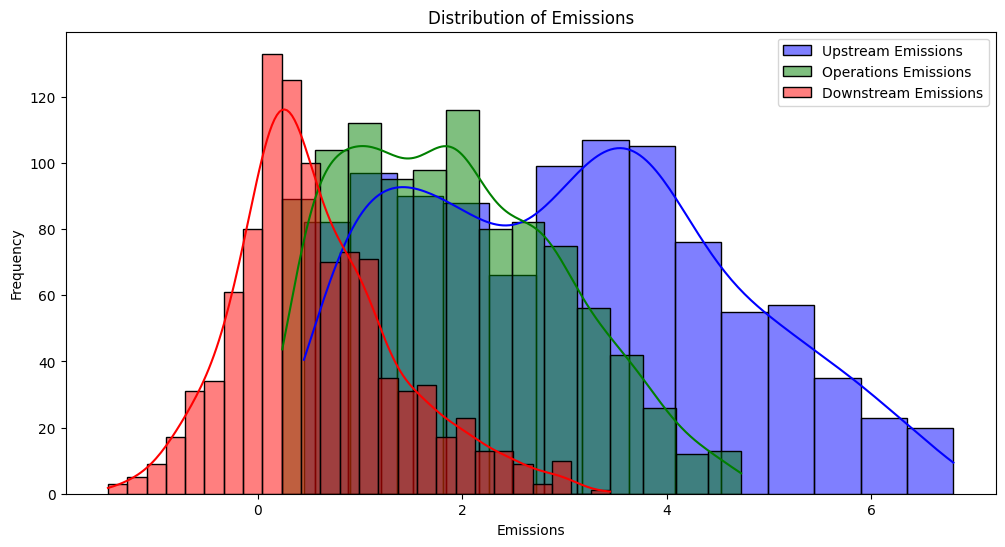

<ipython-input-4-1cf2881c1d89>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="industry_group", y="carbon_footprint_pcf", palette="viridis")


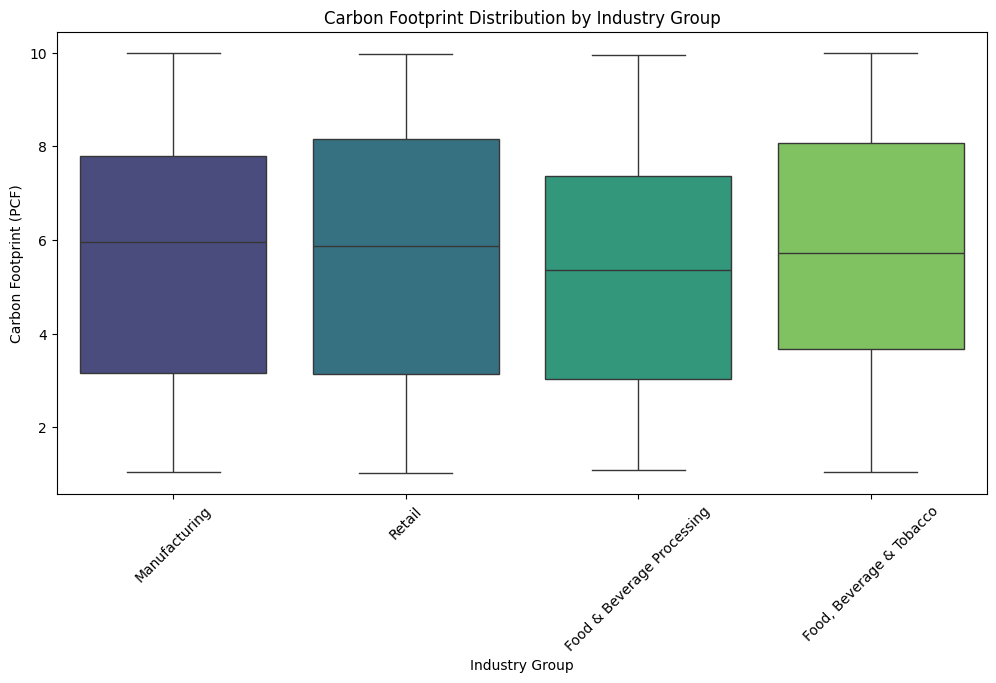

,weight_kg,carbon_footprint_pcf,upstream_percent_total_pcf,operations_percent_total_pcf,downstream_percent_total_pcf,upstream_emissions,operations_emissions,downstream_emissions
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.706154,5.563156,55.072172,34.711251,10.216577,3.069996,1.929734,0.563426
std,1.314618,2.629709,8.720226,8.594680,12.160522,1.561128,1.047075,0.797851
min,0.520844,1.028964,40.000349,20.019602,-19.261626,0.450074,0.238194,-1.467699
25%,1.561880,3.169668,47.840529,27.257023,1.732781,1.716514,1.063495,0.056627
50%,2.735633,5.668605,55.018418,34.528379,10.464320,3.100967,1.847220,0.426072
75%,3.849438,7.844186,62.773106,42.126224,19.103322,4.151696,2.709264,1.009867
max,4.998730,9.994724,69.934626,49.986731,37.773137,6.805963,4.728847,3.445805


In [4]:
# Step 3: Exploratory Data Analysis (EDA)

# Summary statistics
summary_stats = df.describe()

# Visualizing the distribution of emissions
plt.figure(figsize=(12, 6))
sns.histplot(df["upstream_emissions"], kde=True, color="blue", label="Upstream Emissions")
sns.histplot(df["operations_emissions"], kde=True, color="green", label="Operations Emissions")
sns.histplot(df["downstream_emissions"], kde=True, color="red", label="Downstream Emissions")
plt.title("Distribution of Emissions")
plt.xlabel("Emissions")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Boxplot by industry group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="industry_group", y="carbon_footprint_pcf", palette="viridis")
plt.title("Carbon Footprint Distribution by Industry Group")
plt.xlabel("Industry Group")
plt.ylabel("Carbon Footprint (PCF)")
plt.xticks(rotation=45)
plt.show()

summary_stats


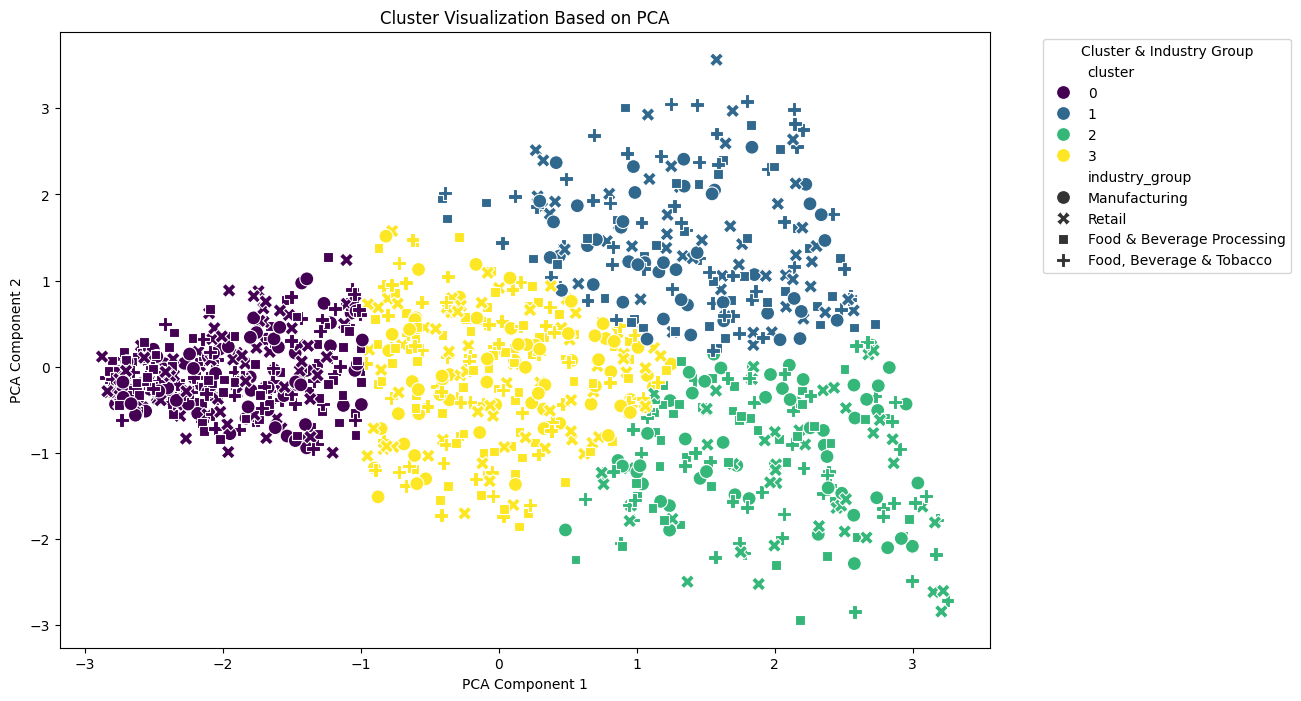

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 4: Clustering Analysis

# Selecting features for clustering
features = df[["upstream_emissions", "operations_emissions", "downstream_emissions", "carbon_footprint_pcf"]]

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster labels to the dataframe
df["cluster"] = clusters

# Visualizing the clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
df["pca1"] = reduced_features[:, 0]
df["pca2"] = reduced_features[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, x="pca1", y="pca2", hue="cluster", palette="viridis", style="industry_group", s=100
)
plt.title("Cluster Visualization Based on PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster & Industry Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [6]:
# Decision Tree (Predicting carbon footprint)
X = df[['weight_kg', 'upstream_percent_total_pcf', 'operations_percent_total_pcf', 'downstream_percent_total_pcf']]
y = df['carbon_footprint_pcf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state

dt_model = DecisionTreeRegressor(random_state=0)  # Add hyperparameter tuning (e.g., max_depth)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 13.754457360404114
